In [1]:
import os
import sys

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

sys.path.append('..')
import data
import utils

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
params = utils.yaml_to_dict('../config.yml')
params['data_dir_images'] = os.path.join('..', params['data_dir_images'])
params['data_dir'] = os.path.join('..', params['data_dir'])

In [9]:
train_ds = data._sources(params=params, mode='training')
train_ds[:5]

[('..\\dataset\\Images\\n02086240-Shih-Tzu/n02086240_12342.jpg', 4),
 ('..\\dataset\\Images\\n02085936-Maltese_dog/n02085936_2627.jpg', 2),
 ('..\\dataset\\Images\\n02085936-Maltese_dog/n02085936_17059.jpg', 2),
 ('..\\dataset\\Images\\n02086079-Pekinese/n02086079_10689.jpg', 3),
 ('..\\dataset\\Images\\n02086240-Shih-Tzu/n02086240_4430.jpg', 4)]

In [10]:
data_input_fn = data.input_fn(train_ds, train=True, params=params)

In [11]:
data_input_fn

({'image': <tf.Tensor 'IteratorGetNext_1:0' shape=(?, 224, 224, 3) dtype=uint8>},
 <tf.Tensor 'IteratorGetNext_1:1' shape=(?,) dtype=int32>)

In [12]:
with tf.Session() as sess:
    elements = sess.run(data_input_fn)

In [13]:
id_label_map = utils.load_id_label_map(params)

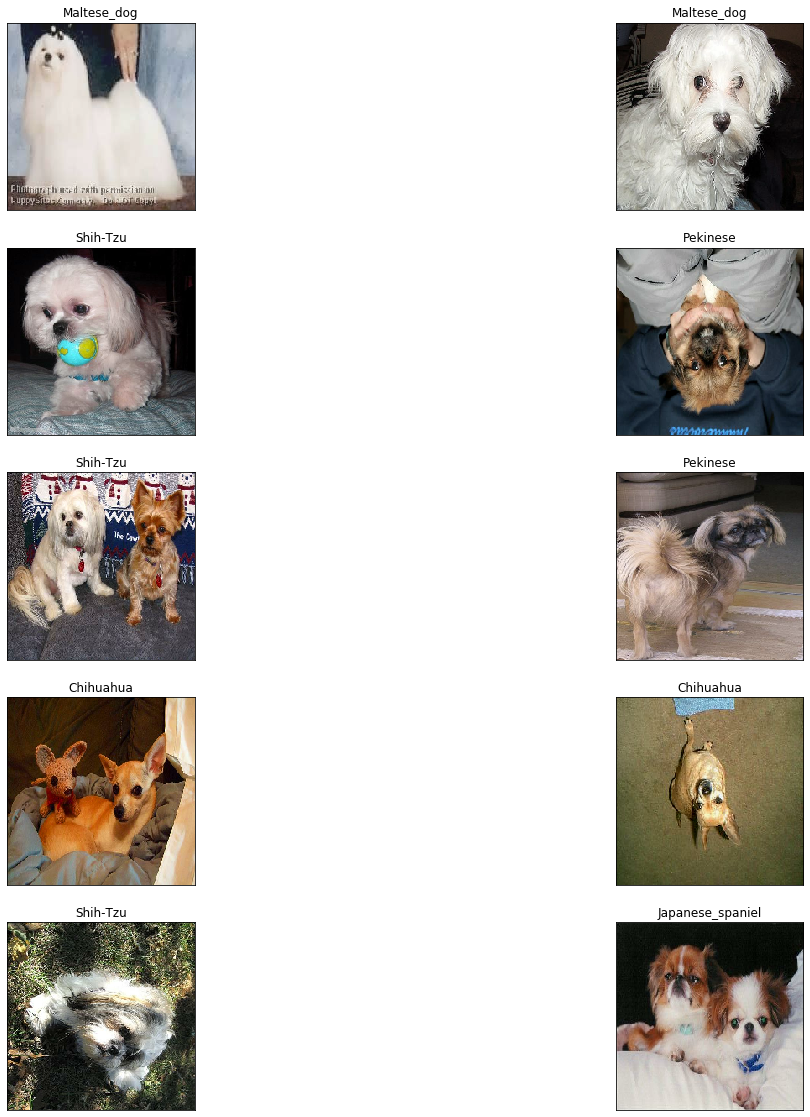

In [14]:
fig, axis = plt.subplots(5,2, figsize=(20,20))
k = 0
for i in range(5):
    for j in range(2):
        img = np.uint8(elements[0]['image'][k])
        title = id_label_map[elements[1][k]]
        axis[i][j].set_title(title)
        axis[i][j].imshow(img)
        axis[i][j].get_xaxis().set_visible(False)
        axis[i][j].get_yaxis().set_visible(False)
        k += 1
plt.show()